In [25]:
## 1. Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [26]:
## 2. Cargar los datos
df = pd.read_csv("../vehicles_us.csv")
print("Dimensiones iniciales:", df.shape)
df.head()

Dimensiones iniciales: (51525, 13)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [27]:
## 3. Información general
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [28]:
## 4. Verificar valores nulos
df.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
condition           0
model               0
price               0
fuel                0
type                0
transmission        0
date_posted         0
days_listed         0
dtype: int64

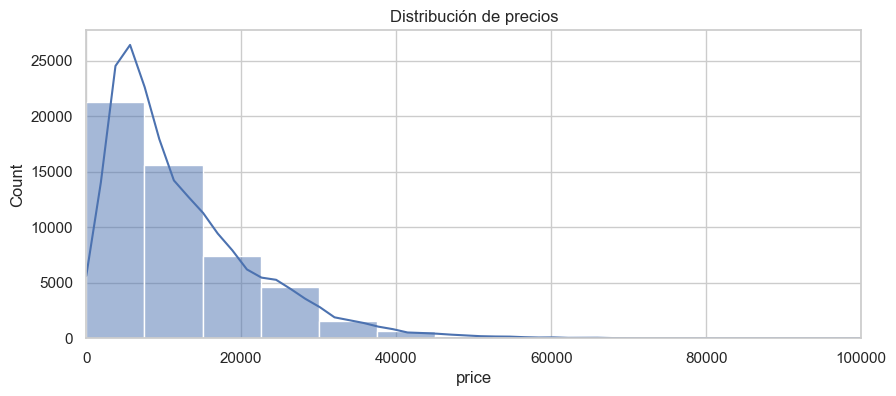

In [29]:
## 5. Visualizar distribuciones clave
plt.figure(figsize=(10, 4))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribución de precios")
plt.xlim(0, 100000)
plt.show()

In [30]:
## 6. Eliminar registros nulos relevantes
df_clean = df.dropna(subset=["price", "odometer", "model_year", "model"])

In [31]:
## 7. Filtros básicos para outliers
df_clean = df_clean[(df_clean["price"] > 100) & (df_clean["price"] < 100000)]
df_clean = df_clean[(df_clean["odometer"] > 0) & (df_clean["odometer"] < 300000)]

In [ ]:
## 8. Comprobar datos únicos
for col in ["model", "fuel", "type", "condition"]:
    print(f"{col} -> {df_clean[col].nunique()} valores únicos")

model -> 99 valores únicos
fuel -> 5 valores únicos
type -> 13 valores únicos
condition -> 6 valores únicos
Archivo limpio guardado como 'vehicles_us_clean.csv'


In [ ]:
## 9. Guardar el archivo limpio
df_clean.to_csv("../vehicles_us_clean.csv", index=False)
print("Archivo limpio guardado como 'vehicles_us_clean.csv'")